# ZNEUS Project 1: MLP - Alisa Podolska, Yulian Kysil

Dataset: https://www.kaggle.com/datasets/meirnizri/covid19-dataset?resource=download (57 MB)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats  
import warnings
import matplotlib
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn import preprocessing
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

## Data analysis + predprocessing

Reading data

In [2]:
data = pd.read_csv("dataset.csv", sep=',')
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
data.rename(columns={'CLASIFFICATION_FINAL': 'CLASSIFICATION_FINAL'}, inplace=True)

Deleting duplicities

In [4]:
duplicates = data[data.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
         USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
19           2             1    1             1  9999-99-99       97   
35           2             1    2             1  9999-99-99       97   
62           2             1    1             2  9999-99-99        2   
63           2             1    2             1  9999-99-99       97   
75           2             1    1             1  9999-99-99       97   
...        ...           ...  ...           ...         ...      ...   
1048556      2            13    2             1  9999-99-99       97   
1048558      1            13    2             1  9999-99-99       97   
1048566      2            13    2             1  9999-99-99       97   
1048570      2            13    2             1  9999-99-99       97   
1048573      2            13    2             1  9999-99-99       97   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
19               2   64         2         2  ...  

In [5]:
duplicates.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASSIFICATION_FINAL,ICU
19,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
35,2,1,2,1,9999-99-99,97,2,45,97,2,...,2,2,2,2,2,2,2,2,3,97
62,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,7,2
63,2,1,2,1,9999-99-99,97,2,33,97,2,...,2,2,2,2,2,2,2,2,7,97
75,2,1,1,1,9999-99-99,97,2,24,2,2,...,2,2,2,2,2,2,2,2,7,97


In [6]:
data = data.drop_duplicates()

In [7]:
print(data)

         USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
0            2             1    1             1  03/05/2020       97   
1            2             1    2             1  03/06/2020       97   
2            2             1    2             2  09/06/2020        1   
3            2             1    1             1  12/06/2020       97   
4            2             1    2             1  21/06/2020       97   
...        ...           ...  ...           ...         ...      ...   
1048568      1            13    2             1  9999-99-99       97   
1048569      1            13    1             2  9999-99-99        2   
1048571      1            13    2             2  9999-99-99        2   
1048572      2            13    2             1  9999-99-99       97   
1048574      2            13    2             1  9999-99-99       97   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
0                1   65         2         2  ...       2        2 

Detecting missing values

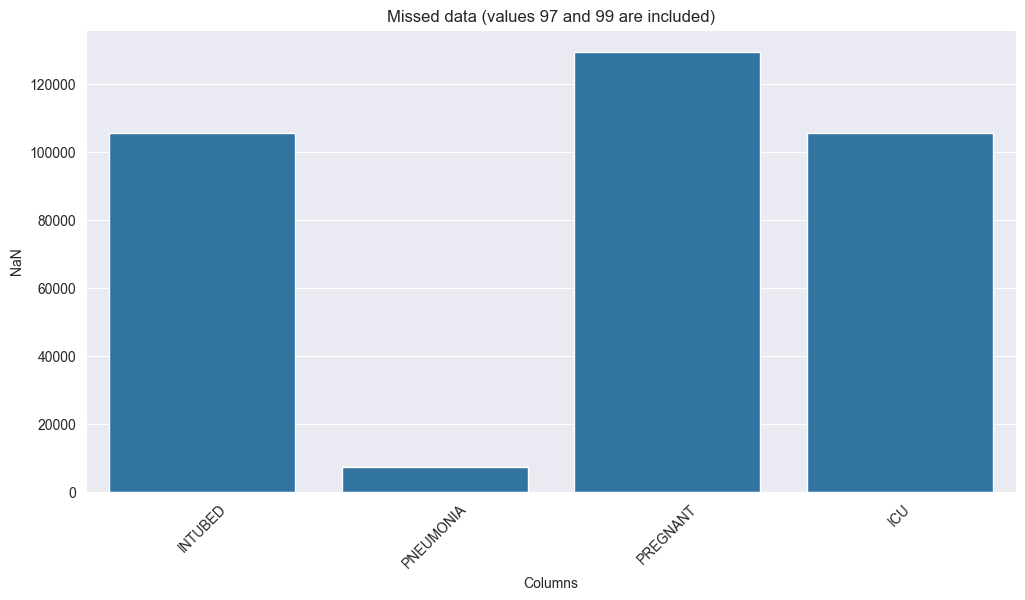

           Total NaN  Percentage NaN
INTUBED       105387       44.556201
PNEUMONIA       7187        3.038567
PREGNANT      129503       54.752120
ICU           105536       44.619196


In [8]:
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
if 'DATE_DIED' in numeric_cols:
    numeric_cols.remove('DATE_DIED')
if 'AGE' in numeric_cols:
    numeric_cols.remove('AGE')
data[numeric_cols] = data[numeric_cols].replace([97, 99], np.nan)

nan_summary = data.isna().sum()
nan_percentage = (nan_summary / len(data)) * 100
nan_info = pd.DataFrame({'Total NaN': nan_summary, 'Percentage NaN': nan_percentage})
nan_info = nan_info[nan_info['Total NaN'] > 0]

plt.figure(figsize=(12, 6))
sns.barplot(x=nan_info.index, y='Total NaN', data=nan_info)
plt.xticks(rotation=45)
plt.ylabel('NaN')
plt.xlabel('Columns')
plt.title('Missed data (values 97 and 99 are included)')
plt.show()
print(nan_info)

Colums with a lot of missing values (>40%) should be deleted

In [9]:
data = data.dropna(axis=1, thresh=len(data) * 0.6)
print(data)

         USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  PNEUMONIA  AGE  \
0            2             1    1             1  03/05/2020        1.0   65   
1            2             1    2             1  03/06/2020        1.0   72   
2            2             1    2             2  09/06/2020        2.0   55   
3            2             1    1             1  12/06/2020        2.0   53   
4            2             1    2             1  21/06/2020        2.0   68   
...        ...           ...  ...           ...         ...        ...  ...   
1048568      1            13    2             1  9999-99-99        2.0   47   
1048569      1            13    1             2  9999-99-99        2.0   56   
1048571      1            13    2             2  9999-99-99        2.0   51   
1048572      2            13    2             1  9999-99-99        2.0   55   
1048574      2            13    2             1  9999-99-99        2.0   52   

         DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENS

Lets decide what to do with column where there is not so many missed values

In [10]:
data[data['PNEUMONIA'].isna()]['SEX'].value_counts(normalize=True)

SEX
1    0.547377
2    0.452623
Name: proportion, dtype: float64

In [11]:
data[data['PNEUMONIA'].isna()]['AGE'].describe()

count    7187.000000
mean       42.944901
std        23.514941
min         0.000000
25%        26.000000
50%        43.000000
75%        60.000000
max       108.000000
Name: AGE, dtype: float64

In [12]:
data[data['PNEUMONIA']==1]['AGE'].describe()

count    99730.000000
mean        56.913707
std         17.717090
min          0.000000
25%         46.000000
50%         58.000000
75%         69.000000
max        120.000000
Name: AGE, dtype: float64

In [13]:
data[data['PNEUMONIA']==2]['AGE'].describe()

count    129609.000000
mean         49.853127
std          19.541605
min           0.000000
25%          36.000000
50%          50.000000
75%          64.000000
max         121.000000
Name: AGE, dtype: float64

We can see that mean of column Age with missing values of pneumonia and mean of column Age without pneumonia(value 2) is much more similar than people with pneumonia(value 1).
So to avoid deletion of 7187 records we changed it to values 2.

In [14]:
data['PNEUMONIA'].fillna(2, inplace=True)

Outliers

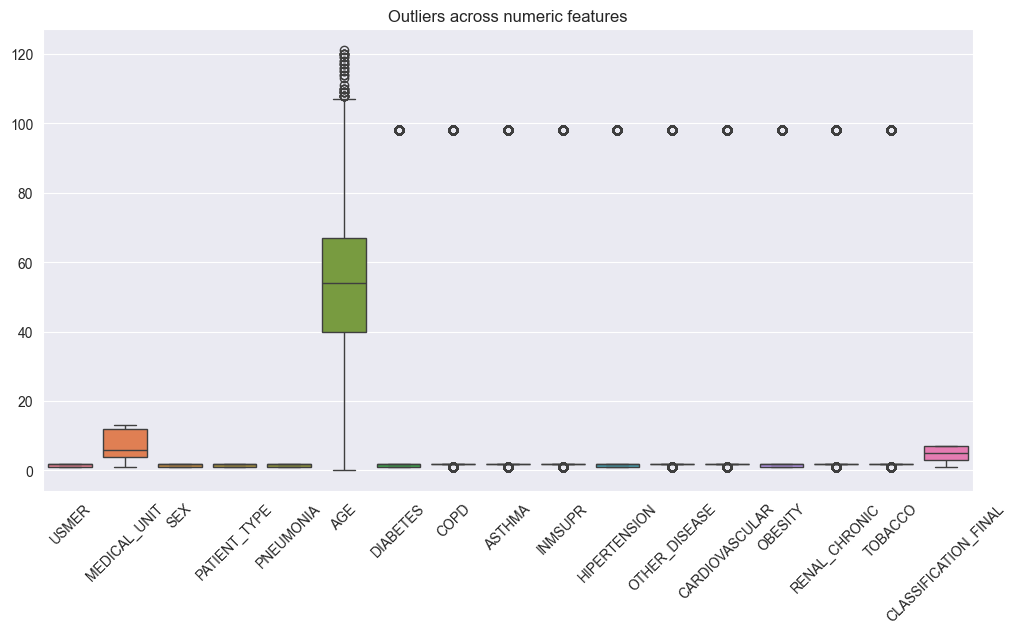

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.select_dtypes(include=[np.number]))
plt.title('Outliers across numeric features')
plt.xticks(rotation=45)
plt.show()

Due too data leakage we should delete column: date_died. It is result after out target value. We cannot use it to classify new data.

In [16]:
data = data.drop(columns=['DATE_DIED'])

## Data analysis on cleaned data

In [17]:
print(f"Record count: {data.shape[0]}, Attribute count: {data.shape[1]}\n{data.dtypes}")

Record count: 236526, Attribute count: 17
USMER                     int64
MEDICAL_UNIT              int64
SEX                       int64
PATIENT_TYPE              int64
PNEUMONIA               float64
AGE                       int64
DIABETES                  int64
COPD                      int64
ASTHMA                    int64
INMSUPR                   int64
HIPERTENSION              int64
OTHER_DISEASE             int64
CARDIOVASCULAR            int64
OBESITY                   int64
RENAL_CHRONIC             int64
TOBACCO                   int64
CLASSIFICATION_FINAL      int64
dtype: object


In [18]:
data['PNEUMONIA'] = data['PNEUMONIA'].astype(int)

Lets look on correlation between attributes

<Axes: >

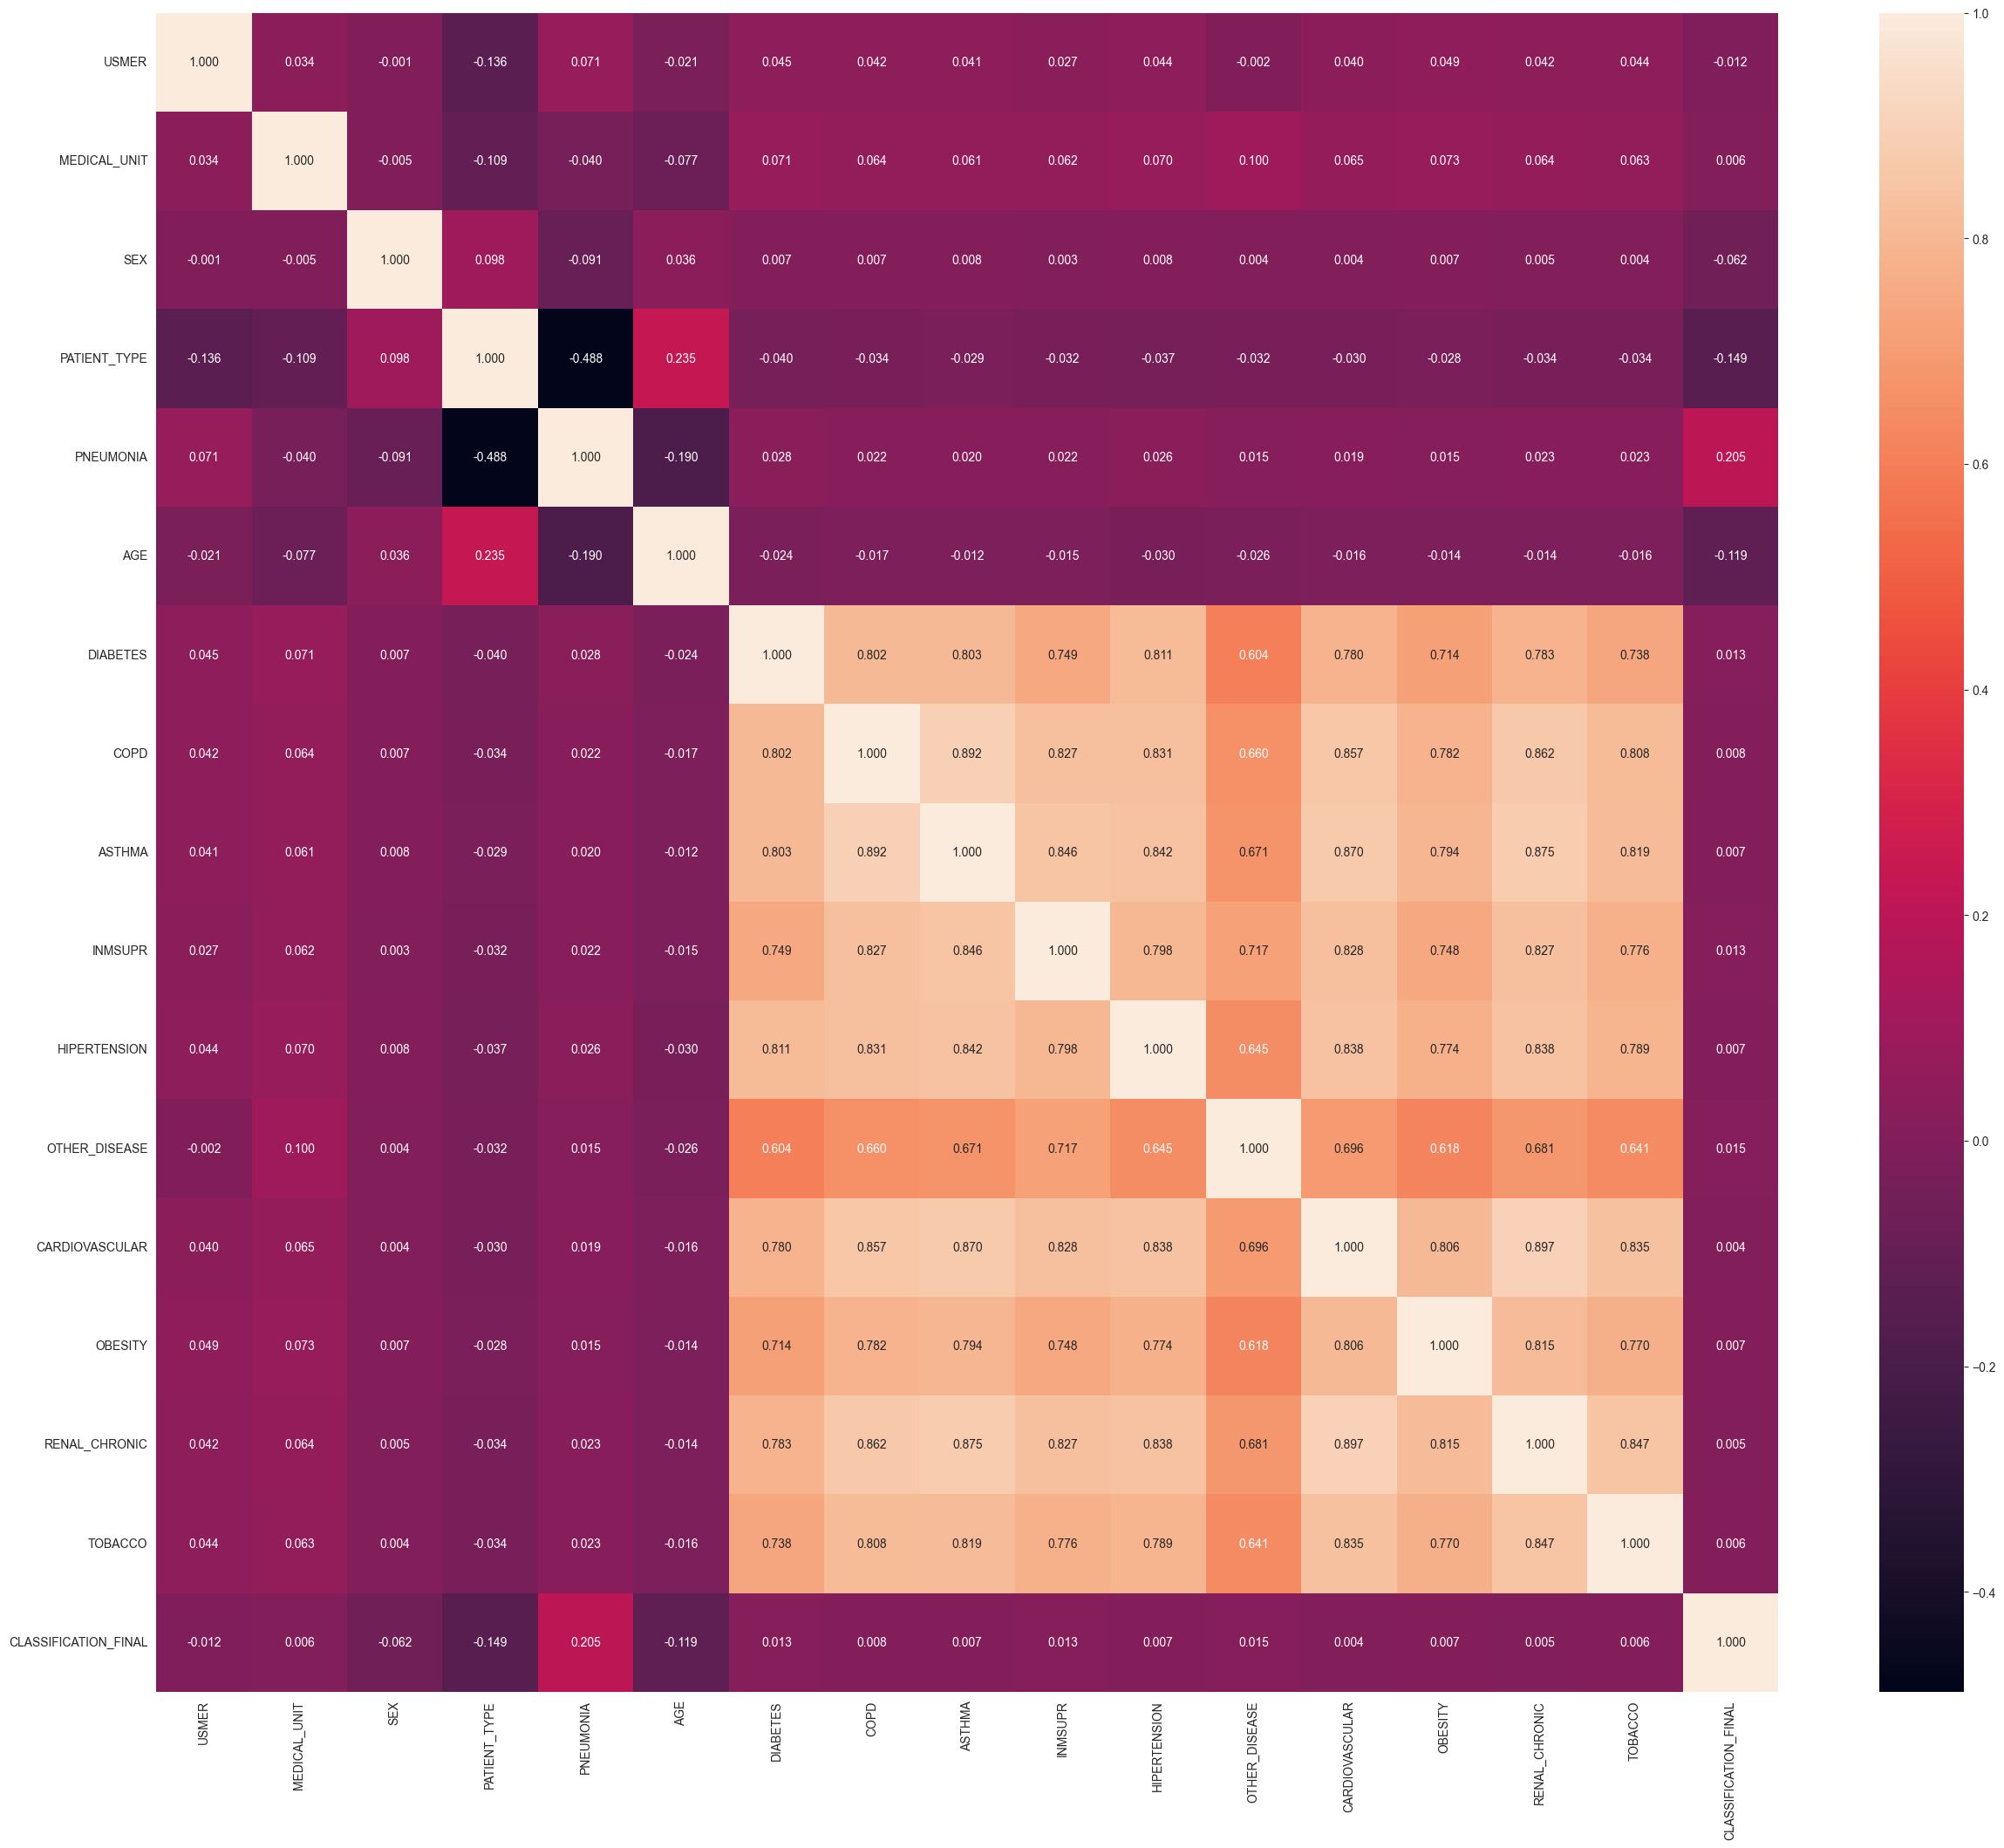

In [19]:
fig, ax = plt.subplots(figsize=(30,25))
sns.heatmap(data.corr(), ax=ax, annot=True, fmt=".3f")

Main attributes (have the biggest dependencies with our target value CLASSIFICATION_FINAL) are: **PNEUMONIA, OTHER_DISEASE, DIABETES, INMSUPR**

**Hypothesis**

Null Hypothesis (**H0**):

The variables age and classification_final are independent.
The presence of age is not associated with the level of patient classification.

Alternative Hypothesis (**H1**):

The variables are dependent.
The presence of age is associated with the level of patient classification.

In [20]:
table = pd.crosstab(data['AGE'], data['CLASSIFICATION_FINAL'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi-Square test for AGE")
print(f"Test result {chi2:.3f}, p-value = {p:.5f}, dof = {dof}")
    
if p < 0.05:
    print(f"There IS a significant relationship between AGE and CLASSIFICATION_FINAL.\n")
else:
    print(f"There is NO significant relationship between AGE and CLASSIFICATION_FINAL.\n")

Chi-Square test for AGE
Test result 9715.468, p-value = 0.00000, dof = 720
There IS a significant relationship between AGE and CLASSIFICATION_FINAL.



Based on the results of the Chi-square test, the obtained p-value is less than 0.05.
Therefore, we reject the null hypothesis and accept the alternative hypothesis.
This indicates that there is a statistically significant association between the presence of AGE and the level of patient classification.

**Distribution of column AGE**

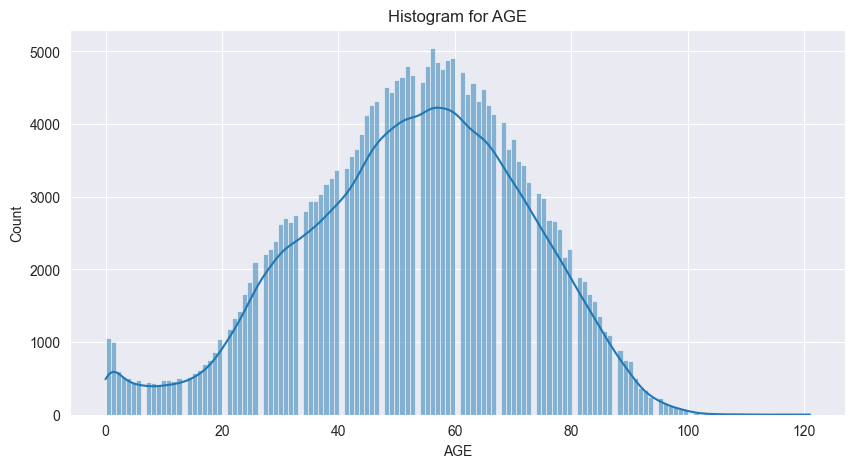

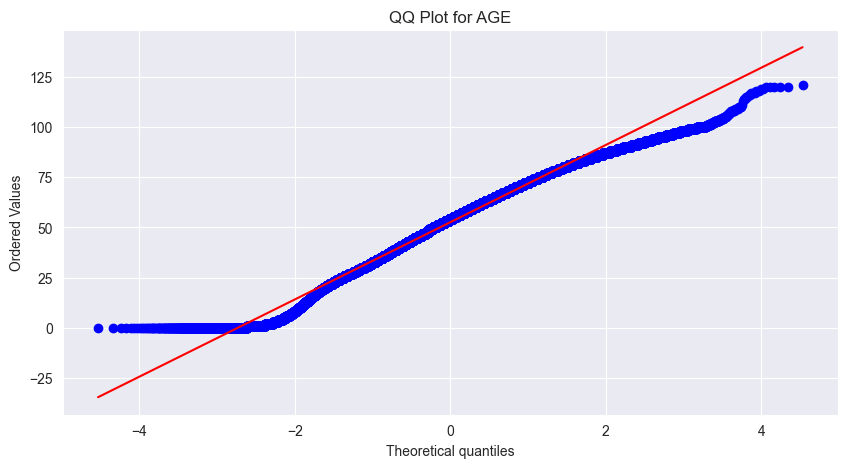

Shapiro-Wilk Test for AGE: Stat=0.990, p-value=0.000
The distribution of AGE is not normal.



In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(data['AGE'], kde=True)
plt.title(f'Histogram for AGE')
plt.show()

plt.figure(figsize=(10, 5))
stats.probplot(data['AGE'], dist="norm", plot=plt)
plt.title(f'QQ Plot for AGE')
plt.show()

stat, p_value = stats.shapiro(data['AGE'])
print(f'Shapiro-Wilk Test for AGE: Stat={stat:.3f}, p-value={p_value:.3f}')
    
if p_value > 0.05:
    print(f'The distribution of AGE is normal.\n')
else:
    print(f'The distribution of AGE is not normal.\n')

## Data normalization

All columns with values 1 and 2 were converted into binary format.

In [22]:
binary_cols = ['PNEUMONIA', 'DIABETES', 'INMSUPR', 'OTHER_DISEASE', 'TOBACCO', 'RENAL_CHRONIC', 'OBESITY', 'CARDIOVASCULAR', 'HIPERTENSION', 'ASTHMA', 'COPD']
data[binary_cols] = data[binary_cols].replace({2: 0})

All categorical features were transformed using one-hot encoding.

In [23]:
categorical_cols = ['SEX', 'PATIENT_TYPE', 'MEDICAL_UNIT']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True, dtype=int)

data = data.rename(columns={
    'SEX_2': 'IS_MALE',
    'PATIENT_TYPE_2': 'IS_HOSPITALIZED'
})

AGE column was normalized using the Min-Max Scaler.

In [24]:
scaler = MinMaxScaler()
data['AGE'] = scaler.fit_transform(data[['AGE']])

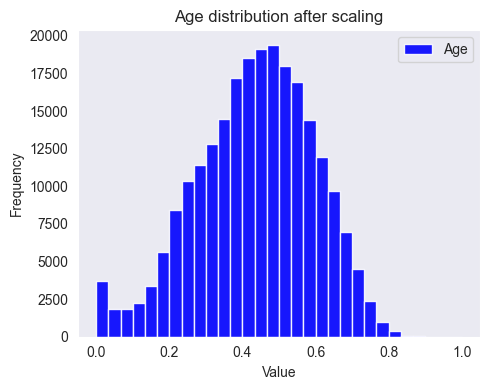

In [25]:
plt.figure(figsize=(5, 4)) 
plt.hist(data['AGE'], bins=30, alpha=0.9, color='blue')
plt.title("Age distribution after scaling")  
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(["Age"])
plt.grid()
plt.tight_layout()
plt.show()

Target column is changed 
- 1–3 → 1 (positive COVID test)
- 4–7 → 0 (negative COVID test)

In [26]:
data['CLASSIFICATION_FINAL'] = data['CLASSIFICATION_FINAL'].apply(lambda x: 1 if x in [1, 2, 3] else 0)

In [27]:
data

,USMER,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,...,MEDICAL_UNIT_4,MEDICAL_UNIT_5,MEDICAL_UNIT_6,MEDICAL_UNIT_7,MEDICAL_UNIT_8,MEDICAL_UNIT_9,MEDICAL_UNIT_10,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13
0,2,1,0.537190,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0.595041,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0.454545,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0.438017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0.561983,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,1,0,0.388430,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1048569,1,0,0.462810,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1048571,1,0,0.421488,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1048572,2,0,0.454545,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


The data normalization process has been completed.
As a result, all features are now numerical and scaled.

## Data split

The dataset divided into three parts:
70% for training,
15% for validation,
15% for testing.

In [28]:
X = data.drop(columns=['CLASSIFICATION_FINAL'])
y = data['CLASSIFICATION_FINAL']

In [29]:
val_size = 0.15
test_size = 0.15

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=val_size / (1 - test_size),
    stratify=y_temp, random_state=42
)


In [30]:
print(len(y_train))
print(f"Train record count: {X_train.shape[0]}, Attribute count: {X_train.shape[1]}\n{X_train.dtypes}")

165568
Train record count: 165568, Attribute count: 27
USMER                int64
PNEUMONIA            int64
AGE                float64
DIABETES             int64
COPD                 int64
ASTHMA               int64
INMSUPR              int64
HIPERTENSION         int64
OTHER_DISEASE        int64
CARDIOVASCULAR       int64
OBESITY              int64
RENAL_CHRONIC        int64
TOBACCO              int64
IS_MALE              int64
IS_HOSPITALIZED      int64
MEDICAL_UNIT_2       int64
MEDICAL_UNIT_3       int64
MEDICAL_UNIT_4       int64
MEDICAL_UNIT_5       int64
MEDICAL_UNIT_6       int64
MEDICAL_UNIT_7       int64
MEDICAL_UNIT_8       int64
MEDICAL_UNIT_9       int64
MEDICAL_UNIT_10      int64
MEDICAL_UNIT_11      int64
MEDICAL_UNIT_12      int64
MEDICAL_UNIT_13      int64
dtype: object


In [31]:
print(len(y_test))
print(f"Test record count: {X_test.shape[0]}, Attribute count: {X_test.shape[1]}\n{X_test.dtypes}")

35479
Test record count: 35479, Attribute count: 27
USMER                int64
PNEUMONIA            int64
AGE                float64
DIABETES             int64
COPD                 int64
ASTHMA               int64
INMSUPR              int64
HIPERTENSION         int64
OTHER_DISEASE        int64
CARDIOVASCULAR       int64
OBESITY              int64
RENAL_CHRONIC        int64
TOBACCO              int64
IS_MALE              int64
IS_HOSPITALIZED      int64
MEDICAL_UNIT_2       int64
MEDICAL_UNIT_3       int64
MEDICAL_UNIT_4       int64
MEDICAL_UNIT_5       int64
MEDICAL_UNIT_6       int64
MEDICAL_UNIT_7       int64
MEDICAL_UNIT_8       int64
MEDICAL_UNIT_9       int64
MEDICAL_UNIT_10      int64
MEDICAL_UNIT_11      int64
MEDICAL_UNIT_12      int64
MEDICAL_UNIT_13      int64
dtype: object


In [32]:
print(len(y_val))
print(f"Val record count: {X_val.shape[0]}, Attribute count: {X_val.shape[1]}\n{X_val.dtypes}")

35479
Val record count: 35479, Attribute count: 27
USMER                int64
PNEUMONIA            int64
AGE                float64
DIABETES             int64
COPD                 int64
ASTHMA               int64
INMSUPR              int64
HIPERTENSION         int64
OTHER_DISEASE        int64
CARDIOVASCULAR       int64
OBESITY              int64
RENAL_CHRONIC        int64
TOBACCO              int64
IS_MALE              int64
IS_HOSPITALIZED      int64
MEDICAL_UNIT_2       int64
MEDICAL_UNIT_3       int64
MEDICAL_UNIT_4       int64
MEDICAL_UNIT_5       int64
MEDICAL_UNIT_6       int64
MEDICAL_UNIT_7       int64
MEDICAL_UNIT_8       int64
MEDICAL_UNIT_9       int64
MEDICAL_UNIT_10      int64
MEDICAL_UNIT_11      int64
MEDICAL_UNIT_12      int64
MEDICAL_UNIT_13      int64
dtype: object


Our dataset is fully ready to be fed into the model.

## Configuration

In [33]:
import json

config_data = {
    "model": {
        "input_dim": 27,
        "hidden_layers": [128, 64, 32],
        "activation": "relu",
        "output_activation": "sigmoid",
        "dropout_rate": 0.3,
        "batch_norm": True,
        "skip_connection": False,
        "bottleneck": False
    },
    "training": {
        "batch_size": 64,
        "epochs": 30,
        "learning_rate": 0.001,
        "optimizer": "adam",
        "early_stopping": True,
        "patience": 5
    },
    "experiment": {
        "name": "baseline_mlp_dropout_bn",
        "description": "Baseline model with dropout and BN"
    }
}

with open("config.json", "w") as f:
    json.dump(config_data, f, indent=4)

with open("config.json", "r") as f:
    config = json.load(f)


## Experiment tracking

In [34]:
from datetime import datetime


def log_experiment(metrics, config, filename="experiments_log.json"):
    entry = {
        "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "experiment_name": config["experiment"]["name"],
        "description": config["experiment"]["description"],
        "config": config,
        "metrics": metrics
    }

    try:
        with open(filename, "r") as f:
            logs = json.load(f)
    except FileNotFoundError:
        logs = []

    logs.append(entry)
    with open(filename, "w") as f:
        json.dump(logs, f, indent=4)


## Experiments - meaningful based on the results of previous experiments
## Including improvement techniques (e.g. Dropout, Normalization layers, Skip Connections, Bottleneck Layers, …)

In [35]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers
from tensorflow.keras.callbacks import EarlyStopping


def build_mlp(cfg):
    inputs = layers.Input(shape=(cfg["input_dim"],))
    x = inputs
    skip_tensor = None

    for i, units in enumerate(cfg["hidden_layers"]):
        x = layers.Dense(units, activation=cfg["activation"])(x)
        if cfg["batch_norm"]:
            x = layers.BatchNormalization()(x)
        if cfg["dropout_rate"] > 0:
            x = layers.Dropout(cfg["dropout_rate"])(x)
        if i == 0 and cfg["skip_connection"]:
            skip_tensor = x

    if cfg["skip_connection"] and skip_tensor is not None:
        if x.shape[-1] != skip_tensor.shape[-1]:
            skip_tensor = layers.Dense(x.shape[-1])(skip_tensor)
        x = layers.Add()([x, skip_tensor])

    if cfg["bottleneck"]:
        x = layers.Dense(16, activation=cfg["activation"])(x)

    outputs = layers.Dense(1, activation=cfg["output_activation"])(x)
    return tf.keras.Model(inputs, outputs)


def run_experiment(config):
    model_cfg = config["model"]
    train_cfg = config["training"]

    model = build_mlp(model_cfg)
    optimizer = optimizers.Adam(learning_rate=train_cfg["learning_rate"])
    model.compile(optimizer=optimizer, loss="binary_crossentropy",
                  metrics=["accuracy", tf.keras.metrics.AUC()])

    callbacks = []
    if train_cfg["early_stopping"]:
        callbacks.append(EarlyStopping(monitor="val_loss",
                                       patience=train_cfg["patience"],
                                       restore_best_weights=True))

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=train_cfg["epochs"],
        batch_size=train_cfg["batch_size"],
        callbacks=callbacks,
        verbose=0
    )

    loss, acc, auc = model.evaluate(X_test, y_test, verbose=0)
    metrics = {"loss": loss, "accuracy": acc, "auc": auc}
    print(f"✅ {config['experiment']['name']} -> acc={acc:.3f}, auc={auc:.3f}")
    log_experiment(metrics, config)
    return metrics


## Hyperparameter search (grid/random) / sweep

In [36]:
import random

dropouts = [0.2, 0.3, 0.4]
bns = [True, False]
bottlenecks = [False, True]

for d in dropouts:
    for bn in bns:
        for bottleneck in bottlenecks:
            config["model"]["dropout_rate"] = d
            config["model"]["batch_norm"] = bn
            config["model"]["bottleneck"] = bottleneck
            config["experiment"]["name"] = f"grid_d{d}_bn{bn}_bot{bottleneck}"
            config["experiment"]["description"] = "Grid search experiment"
            run_experiment(config)

for i in range(5):
    config["model"]["dropout_rate"] = random.choice([0.1, 0.2, 0.3, 0.4, 0.5])
    config["model"]["batch_norm"] = random.choice([True, False])
    config["model"]["bottleneck"] = random.choice([True, False])
    config["model"]["skip_connection"] = random.choice([True, False])

    config["experiment"]["name"] = f"random_{i}"
    config["experiment"]["description"] = "Random search"
    run_experiment(config)


✅ grid_d0.2_bnTrue_botFalse -> acc=0.642, auc=0.681
✅ grid_d0.2_bnTrue_botTrue -> acc=0.638, auc=0.680
✅ grid_d0.2_bnFalse_botFalse -> acc=0.641, auc=0.681
✅ grid_d0.2_bnFalse_botTrue -> acc=0.641, auc=0.680
✅ grid_d0.3_bnTrue_botFalse -> acc=0.641, auc=0.681
✅ grid_d0.3_bnTrue_botTrue -> acc=0.641, auc=0.681
✅ grid_d0.3_bnFalse_botFalse -> acc=0.640, auc=0.681
✅ grid_d0.3_bnFalse_botTrue -> acc=0.639, auc=0.680
✅ grid_d0.4_bnTrue_botFalse -> acc=0.640, auc=0.680
✅ grid_d0.4_bnTrue_botTrue -> acc=0.636, auc=0.677
✅ grid_d0.4_bnFalse_botFalse -> acc=0.640, auc=0.680
✅ grid_d0.4_bnFalse_botTrue -> acc=0.636, auc=0.680
✅ random_0 -> acc=0.640, auc=0.681
✅ random_1 -> acc=0.639, auc=0.681
✅ random_2 -> acc=0.639, auc=0.681
✅ random_3 -> acc=0.636, auc=0.676
✅ random_4 -> acc=0.636, auc=0.680


## Results and evaluation metrics

TOP-10 Experiments by AUC:



,time,name,accuracy,auc,dropout,skip,bn,bottleneck,rank
0,2025-10-25 22:18:11,grid_d0.2_bnFalse_botFalse,0.6405,0.6814,0.2,False,False,False,1
1,2025-10-25 22:17:08,grid_d0.2_bnTrue_botFalse,0.6415,0.6811,0.2,False,True,False,2
2,2025-10-25 22:19:07,grid_d0.3_bnTrue_botFalse,0.6412,0.6811,0.3,False,True,False,3
3,2025-10-25 22:22:27,random_1,0.6385,0.6810,0.5,False,False,False,4
4,2025-10-25 22:19:32,grid_d0.3_bnTrue_botTrue,0.6405,0.6809,0.3,False,True,True,5
5,2025-10-25 22:23:05,random_2,0.6389,0.6808,0.4,False,False,False,6
6,2025-10-25 22:19:51,grid_d0.3_bnFalse_botFalse,0.6403,0.6806,0.3,False,False,False,7
7,2025-10-25 22:18:35,grid_d0.2_bnFalse_botTrue,0.6407,0.6805,0.2,False,False,True,8
8,2025-10-25 22:21:50,random_0,0.6400,0.6805,0.4,False,True,False,9
9,2025-10-25 22:20:31,grid_d0.4_bnTrue_botFalse,0.6399,0.6800,0.4,False,True,False,10


Best parameter combination:
time                 2025-10-25 22:18:11
name          grid_d0.2_bnFalse_botFalse
accuracy                          0.6405
auc                               0.6814
dropout                              0.2
skip                               False
bn                                 False
bottleneck                         False
rank                                   1
Name: 0, dtype: object


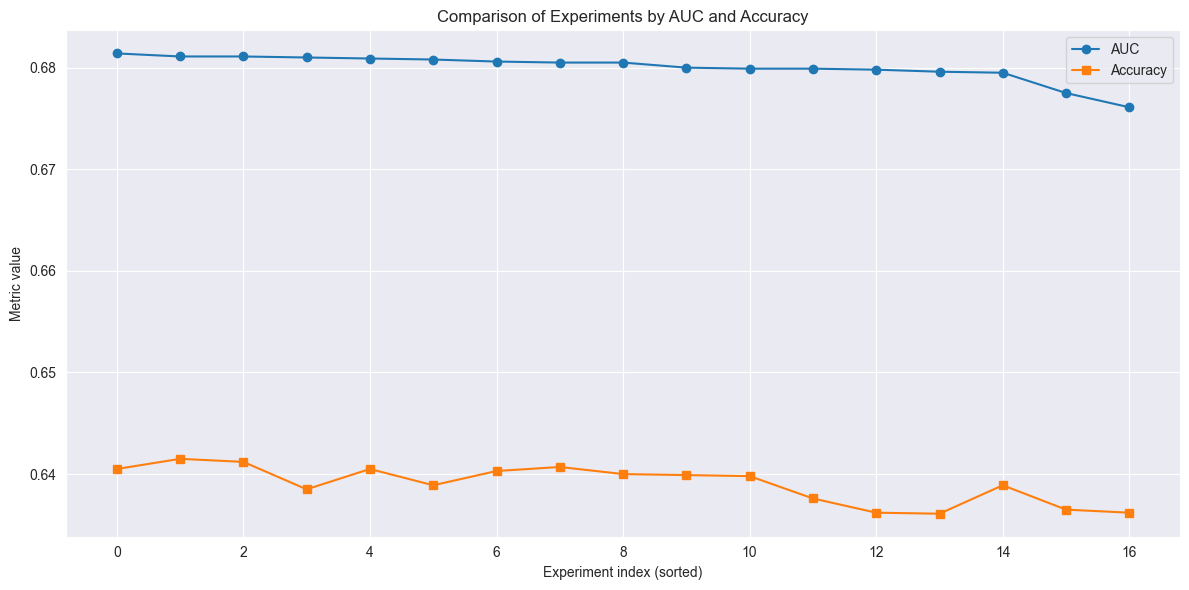

In [45]:
with open("experiments_log.json", "r") as f:
    logs = json.load(f)

df_logs = pd.DataFrame([{
    "time": log["timestamp"],
    "name": log["experiment_name"],
    "accuracy": round(log["metrics"]["accuracy"], 4),
    "auc": round(log["metrics"]["auc"], 4),
    "dropout": log["config"]["model"]["dropout_rate"],
    "skip": log["config"]["model"]["skip_connection"],
    "bn": log["config"]["model"]["batch_norm"],
    "bottleneck": log["config"]["model"]["bottleneck"]
} for log in logs])

df_logs = df_logs.sort_values(by=["auc", "accuracy"], ascending=False)
df_logs.reset_index(drop=True, inplace=True)

df_logs["rank"] = df_logs.index + 1

print("Experiments by AUC:\n")
display(df_logs.head(20))

best = df_logs.iloc[0]
print("Best parameter combination:")
print(best)

# --- Visualization ---
plt.figure(figsize=(12, 6))
plt.plot(df_logs.index, df_logs["auc"], marker="o", label="AUC")
plt.plot(df_logs.index, df_logs["accuracy"], marker="s", label="Accuracy")
plt.title("Comparison of Experiments by AUC and Accuracy")
plt.xlabel("Experiment index (sorted)")
plt.ylabel("Metric value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
